# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
import numpy
def f(x):
    f = (x**2)*numpy.sin(x)
    return f

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    g = (2*x)*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2
    return g

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    max_value = g(xmax)
    min_value = g(xmin)
    d = max_value - min_value
    return d

Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [14]:
import numpy
def integrate_numeric(xmin,xmax,N):
    dx =(xmax-xmin)/N
    
    co2 = 0
    co4 = 0
    
    for i in range (1,N):
        co2 = co2+2*f(xmin + (dx*i))
        
    for j in range (0,N):
        co4 = co4+4*f(xmin+(dx*(((2*j)+1)/2)))
        
    return (dx/6)*(f(xmin)+f(xmax)+co2+co4)


    

Make sure you have implemented Simpson's rule correctly:

In [15]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [16]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Error between Analytical and Numeric Integration')

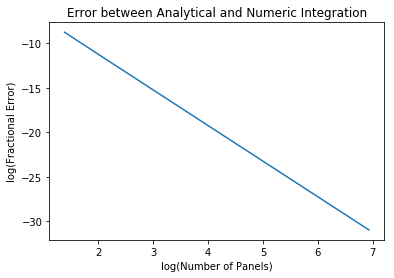

In [19]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
yvalues = []
i=0
for i in range (0,9):
    yvalues.append((integrate_analytic(x0, x1)-integrate_numeric(x0,x1,(2**(i+2))))/integrate_analytic(x0,x1))
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
plt.plot(numpy.log(panel_counts),numpy.log(yvalues))
plt.xlabel('log(Number of Panels)')
plt.ylabel('log(Fractional Error)')
plt.title('Error between Analytical and Numeric Integration')


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The more panels used the closer the numerical method gets to the analytical result (a better approximation). When too many panels are used then dx will become very small and the round off error associated will become relatively large and therefore the accuracy suffers.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

More panels would mean more accuracy but for each panel added the accuracy does not increase as quickly as it does for simpsons rule so the slope of the graph would be less.